# MNIST Dataset
- **MNIST dataset** consist of images of handwritten digits.
  - It is a set of 70,000 28x28 pixel grayscale images of the 10 digits(0-9), along with a corresponding file with the digit labels (1 to 10).

    ![alt text](Images/image-1.png)
- $Number of pixel = 28x28 = 784$
- $Number of classes/labels/outputs = 10$
- $Number of features are equal to the number of pixels = 784$
- Number of hidden layers = ?
  - Depend on the experience of the user.

# Goal: Handwritten Digit Recognition


# 0. Importing the libraries

In [287]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import style
style.use('default')

import torch
import torch.nn as nn
import torch.nn.functional as F      # <- Use to create our activation functions.
from torch.utils.data import DataLoader, TensorDataset

# from sklearn.model_selection import train_test_split

# Checking the availability of GPU

In [288]:
torch.cuda.is_available()

False

# Selecting the GPu as a device for training and testing

In [289]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


# 1. Importing and processing the Data

### &nbsp;&nbsp;&nbsp;&nbsp; 1.1 Importing the dataset

In [290]:
dataset = pd.read_csv('mnist_train.csv')

dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [291]:
dataset.shape

(60000, 785)

- For the learning purpose we will use only 10000 samples

### &nbsp;&nbsp;&nbsp;&nbsp; 1.2 Transforming the Data into numpy array and extracting 10000 samples

In [292]:
# Transforming the data into numpy array
dataset = np.array(dataset)

# Extracting 10000 samples
dataset = dataset[0 : 10000, :]                # <= Assigning 10000 rows and all columns to the dataset

### &nbsp;&nbsp;&nbsp;&nbsp; 1.3 Extracting the Features and labels

In [ ]:
# the 1st column is the label
Y = dataset[:, 0]                              # <= i want all the rows of the 1st column

# from column 1 are the features
X = dataset[:, 1:]                                # <= I want all the rows starting from column 1

In [294]:
X.shape

(10000, 784)

- Now X has 10000 Features and 784 labels

# 2. Convert the Data to pytorch tensor

In [295]:
# Converting the feature from numpy array to pytorch tensor
X_tensor = torch.tensor(X, dtype = torch.float32)

# Converting the labes from numpy array to pytorch tensor
Y_tensor = torch.tensor(Y, dtype = torch.long)

# 3. Splitting the Data into train and test set

In [296]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_tensor, Y_tensor, test_size = 0.1)

- Using 10% of the 10000 i.e. 1000 as test set and 9000 as train set

# 4. Normalizing the Features
- **For Data Normalization**: we divide the train and test set by the maximum value in the dataset<br>
$$\mathbf{ X_{train} = \frac{X_{train}}{max(X)} }$$
$$\mathbf{ X_{test} = \frac{X_{test}}{max(X)} }$$

In [297]:
# Normalizing the train features
X_train = X_train/torch.max(X_train)

# Normalizing the test features
X_test = X_test/torch.max(X_test)

# 5. Converting into Pytorch Dataset

In [298]:
# train Dataset
Tensor_train_dataset = TensorDataset(X_train, Y_train)

# converting into test Dataset
Tensor_test_dataset = TensorDataset(X_test, Y_test)

# 6. Pushing the Tensor Dataset into the Dataloader objects

In [ ]:
# Initialize the Batch size
batchsize = 32

# Creating the training dataloader
train_dataloader = DataLoader(Tensor_train_dataset, batch_size = batchsize, shuffle = True, drop_last = True)     # <= shuffling: To randomize the order after each batch when training to avoid Overfitting
                                                                                                                  # <= During shuffling, cross validation will be performed
                                                                                                                  # 9000 / 32 = 281.25 therefore the remainder i.e. 0.25 will be drop.

# Creating the test dataloader
test_dataloader = DataLoader(Tensor_test_dataset, batch_size = Tensor_test_dataset.tensors[0].shape[0])           # <= Tensor_test_dataset.tensors[0].shape[0], means we're passing the whole ..
                                                                                                                  # ... test size during training i.e. 1000

In [300]:
Tensor_test_dataset.tensors[0].shape[0]

1000

In [301]:
# Apply a for loop on the train loader and breaking after each run
for X, Y in train_dataloader:
  break
X.shape

torch.Size([32, 784])

# 7. Visualizing Few Sample

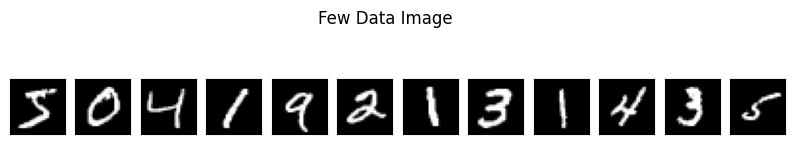

In [ ]:
# Visualizing few images in the MNIST dataset
fig, axs = plt.subplots(1, 12, figsize = (10, 2))

for i in range(12):
  axs[i].imshow(X_tensor[i, :].view(28,28).detach(), cmap ='gray')
  axs[i].set_xticks([]), axs[i].set_yticks([])
plt.suptitle('Few Data Image')
plt.show()

# 8. Creating the ANN model

### &nbsp;&nbsp;&nbsp;&nbsp; 8.1 Creating the ANN Class

In [ ]:
######################################## Creating the ANN model  ########################################
########################################## ➡️Sequential Form⬅️ #########################################

# ANN_iris = nn.Sequential(
#     nn.Linear(784, 64),
#     nn.Relu(),
#     nn.Linear(64, 32),
#     nn.ReLU(),
#     nn.Linear(32, 32)
#     nn.ReLU()
#     nn.Linear(32, 10)                          #<- Has a build-in sigmoid function after the output layer
# )

############################## ⬇️Transforming the Sequential Form into Class Form⬇️ #######################

class ANN_Classifier(nn.Module):
    def __init__(self):
        super().__init__()

    # Initializing the layers
        # Input Layer
        self.input = nn.Linear(784, 64)

        # 1st Hidden layer
        self.hidden_1 = nn.Linear(64, 32)

        # 2nd Hidden Layer
        self.hidden_2 = nn.Linear(32, 32)

        # Output layer
        self.output = nn.Linear(32, 10)

    # Forward Pass                                                         # <- Forward Pass tells how we want to pass our features.
    def forward(self, X):

        # firstly, Passing the features through input layer
        X = self.input(X)

        # secondly, through the 1st hidden layer
        X = self.hidden_1(X)

        # thirdly, through the activation function.
        X = F.relu(X)

        # then through the 2nd hidden layer
        X = self.hidden_2(X)

        # next, through the activation function.
        X = F.relu(X)


        # after that, through the output layer
        X = self.output(X)

        # Finally, through the sigmoid activation function.
        # X = torch.sigmoid(X)                                             # <= For Classification Problem we always have sigmoid activation after the output layer, but ..
                                                                              # |=> ... Cross entropy have a built in sigmoid activation function, that is why we don't ...
                                                                              # |=> ... ❌ If use at the same time with CrossEntropy() my accuracy will be so low.


        return X

### &nbsp;&nbsp;&nbsp;&nbsp; 8.2 Instantiating the ANN Class

In [304]:
# Creating the ANN model
ANN_model = ANN_Classifier()

# 9. Training the Neural Network Model 🎁Will always be used🎁

### &nbsp;&nbsp;&nbsp;&nbsp; 9.1 Setting the Parameters of the Model

In [ ]:
# Setting the Learning rate
learning_rate = 0.01

# Setting the Loss Function
loss_function = nn.CrossEntropyLoss()                                                           # <= We use CrossEntropyLoss() since we're performing classification

# Setting the Optimizer
optimizer = torch.optim.SGD(ANN_model.parameters(), momentum = 0.9, lr = learning_rate)          # <= SGD = Stochastic Gradient Descent as optimizer

# Placing the ANN_model on GPU
ANN_model.to(device)

ANN_Classifier(
  (input): Linear(in_features=784, out_features=64, bias=True)
  (hidden_1): Linear(in_features=64, out_features=32, bias=True)
  (hidden_2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=10, bias=True)
)

### &nbsp;&nbsp;&nbsp;&nbsp; 9.2 Training and Testing the Model

In [ ]:
# Number of times we want to pass the entire dataset in the ANN model
number_of_epochs = 101

# Creating a 1D tensor filled with zeros, in order to track/store the losses at each  epoch
losses = torch.zeros(number_of_epochs)                                       # <- initializing the losses tensor with 1000 zeros and at each epoch we'll store the loss
                                                                             # <- During the forward propagation we'll calculate the loss and store it in the losses tensor.
# Initializing accuracy
train_accuracy = []
test_accuracy  = []

# Using a for loop to pass the dataset 1000 times into the model
for epochi in range(number_of_epochs):

    # Putting the model in the training mode
    ANN_model.train()

    # putting the model in the device 📍📍Added📍📍
    ANN_model.to(device)
    
    
    # for loop for training in batches
    batch_accuracy = []
    batch_loss     = []

    # The for loop ensure that during a single run only 32 sample will be passed
    for X,Y in train_dataloader:

      # Placing feature on device, since the model is in GPU feature should also be in GPU
      X = X.to(device)

      # Placing labels on device, since the model is in GPU feature should also be in GPU
      Y = Y.to(device)



      # Forward Propagation
      y_pred = ANN_model(X)                 # <- We pass the features x into the model and then the output of the model is our predictions y_pred.

      # We calculate/compute the loss
      loss = loss_function(y_pred, Y)                  # <- To calculate/compute the loss we pass the predictions y_pred and the true values y into the loss_function()...
                                                     # ... for that particular training epoch.



      # Backward  Propagation                          # <- Backward Propagation is the process of calculating the gradients of the loss function with respect to the model parameters.

      # Initialize the gradients to zero
      optimizer.zero_grad()                            # <- zero_grad() restart the gradients to zero at each epoch, so that the gradients/losses are not accumulated.

      # Calculating the gradients
      loss.backward()                                  # <- loss.backward() is used to calculate the gradients of the loss with respect to the parameters of the model.


      # Updating the model parameters
      optimizer.step()                                 # <- The optimizer.step() is used to update the model parameters so that the error could be minimized.

      # Append Batch loss after performing the batch training
      batch_loss.append(loss.item())

      # Putting y_pred back to cpu
      y_pred = y_pred.cpu()
      Y = Y.cpu()


      # Computing the Batch accuracy
      accuracy = 100*torch.mean((torch.argmax(y_pred, axis = 1) == Y ).float())
      # Appending the batch accuracy
      batch_accuracy.append(accuracy)

      ####### Batch concluded

    # Average training accuracy(outside the batch loop)
    train_accuracy.append(np.mean(batch_accuracy))                # <= tracking accuracy is the average of the batch accuracy.

    # Total Accuracy is the mean of the batch_loss
    losses[epochi] = np.mean(batch_loss)                          # <- Storing the loss at each epoch in a tensor losses. i.e. Put the computed loss into the epoch-th position of the losses tensor.
                                                                  # <- at each epoch/iteration we'll replace the respective zero with the calculated loss.


##################################################################################➡️ testing the model ⬅️##########################################################################################

    # Putting the model on the Testing Mode
    ANN_model.eval()


    # Passing all the samples at once from the test_dataloader to the train model
    X, Y = next(iter(test_dataloader))

    # Pushing X and Y in GPU
    X = X.to(device)
    Y = Y.to(device)

    # Deactivating the gradient since during back propagation we don't need the gradient
    with torch.no_grad():

      # Passing the testing data to the model
      y_pred = ANN_model(X)                           # <= Here we will obtain the prediction

      # Putting the prediction back to cpu
      y_pred = y_pred.cpu()
      Y = Y.cpu()

      # Appending the test accuracy
      test_accuracy.append(100 * torch.mean((torch.argmax(y_pred, dim = 1) == Y).float()))
      # printing the losses after every 10 epochs
      if (epochi % 10) == 0:
        print(f'epochs: {epochi}, loss: {loss : 2.2f}')


# Visualize the loss and accuracies after the training loop
fig, ax = plt.subplots(1, 2, figsize = (18, 6))       # <= 1 row, 2 column

ax[0].plot(losses, 'g', lw = 3, label = 'Train')      # <= ax[0] means we're plotting on the 1st column, i.e. losses on the first column, g = green
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)
ax[0].legend(fontsize = 15)

ax[1].plot(train_accuracy, 'b', lw = 3, label = 'Train')   # <= ax[1] means we're plotting on the 2nd column
ax[1].plot(test_accuracy, 'r', lw = 3, label = 'Test')
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim(10, 110)                                    # <= Setting the y limit between 10 and 110 so that we can clearly see the accuracy
ax[1].set_title(f'Train Accuracy: {train_accuracy[-1]:.2f}% \n Test Accuracy: {test_accuracy[-1]:.2f}%', fontsize = 15)       # <= Printing the final values
ax[1].legend(fontsize = 15)

plt.show()

epochs: 0, loss:  0.59
epochs: 10, loss:  0.25
epochs: 20, loss:  0.01
epochs: 30, loss:  0.02
epochs: 40, loss:  0.00
epochs: 50, loss:  0.00
epochs: 60, loss:  0.00
epochs: 70, loss:  0.00


# 10. Visualizing the Loss and Accuracies

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))

ax[0].plot(losses, 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)
ax[0].legend(fontsize = 15)

ax[1].plot(train_accuracy, 'b', lw = 3, label = 'Train')
ax[1].plot(test_accuracy, 'r', lw = 3, label = 'Test')
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim(10, 110)
ax[1].set_title(f'Train Accuracy: {train_accuracy[-1]:.2f}% \n Test Accuracy: {test_accuracy[-1]:.2f}', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()


- we can see that as the epoch was 0 the loss was high, but as the epoch increase the loss decrease

# Saving the Trained Model

In [ ]:
# Save the model with its current state(weights and biases) in the dictionary
# torch.save(model_name.state_dict(), 'name.pt')
torch.save(ANN_model.state_dict(), 'My_Train_Model.pt')

# loading the Model


In [ ]:
ANN_model.load_state_dict(torch.load('My_Train_Model.pt'))

# Test the Loaded Model

In [ ]:
ANN_model.to(device)

# Passing all the samples at once from the test_dataloader to the train model
X, Y = next(iter(test_dataloader))

# Pushing X and Y in GPU
X = X.to(device)
Y = Y.to(device)

# Deactivating the gradient since during back propagation we don't need the gradien
with torch.no_grad():

  # Passing the testing data to the model
  y_pred = ANN_model(X)                           # <= Here we will obtain the prediction

  # Putting the prediction back to cpu
  y_pred = y_pred.cpu()
  Y = Y.cpu()

# Appending the test accuracy
accuracy = 100 * torch.mean((torch.argmax(y_pred, dim = 1) == Y).float())
accuracy